In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# KNN -  K Nearest Neighbors - Classification

To understand KNN for classification, we'll work with a simple dataset representing gene expression levels. Gene expression levels are calculated by the ratio between the expression of the target gene (i.e., the gene of interest) and the expression of one or more reference genes (often household genes). This dataset is synthetic and specifically designed to show some of the strengths and limitations of using KNN for Classification.


More info on gene expression: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gene-expression-level



In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/ml/gene_expression.csv'


df = pd.read_csv(file_path)

df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

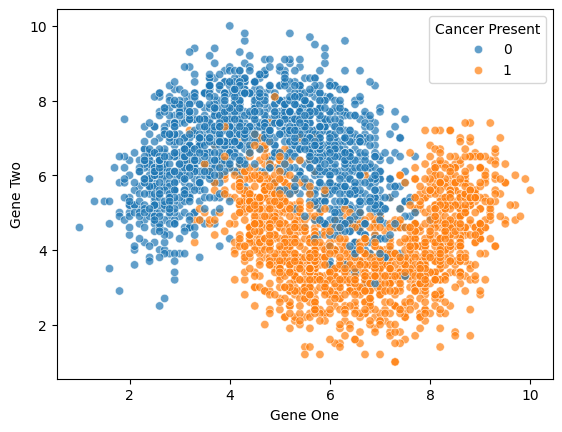

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

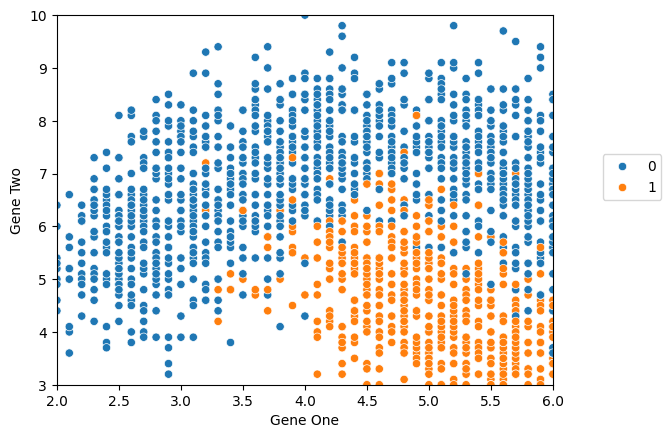

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Assuming X and y are already defined from your previous code
# X = df.drop('Cancer Present',axis=1)
# y = df['Cancer Present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1) # You can adjust n_neighbors
knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))


Accuracy: 0.8911111111111111
Confusion Matrix:
 [[422  48]
 [ 50 380]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



# Understanding KNN and Choosing K Value

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)

    y_pred_test = knn_model.predict(scaled_X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

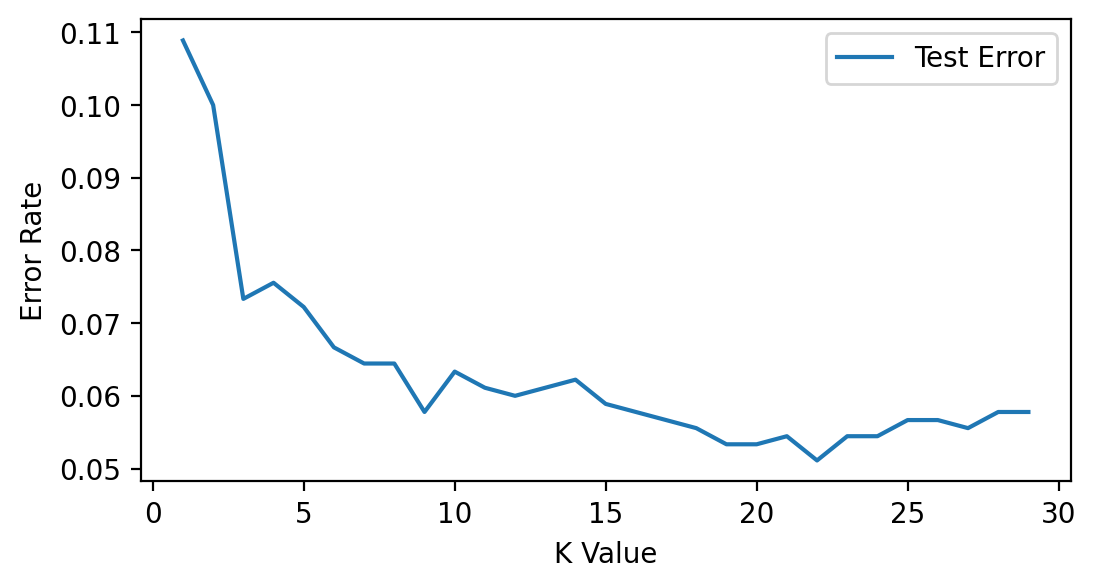

In [ ]:
plt.figure(figsize=(6,3),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [ ]:
# prompt: solve it with knn and GridSearchCV use pipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {    'knn__n_neighbors': list(range(1, 30)) } # Search for the best k value

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy') # Use 5-fold cross validation

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Accuracy: 0.9488888888888889
Confusion Matrix:
 [[452  18]
 [ 28 402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900

Best Hyperparameters: {'knn__n_neighbors': 22}
Best Score: 0.930952380952381
